DDPG Notes:
--Need a replay buffer class

--Need a class for a targe Q network, depending on the states and actions , first layer enter states , second the actions

--It use a batch norm ???

--Deterministic Policy, how hande explore exploit?

--Deterministic policy means outputs the actual action instead of a probability

--We will need to bound the actions to the env limits

--We have 2 actors and 2 critics networks , for each one of the networks it's a target.

--Upadates the target using soft udate theta_target = Tau*Thea_target + (1- Theta_target, where Tau is << 1 , in this case 0.01

--The target actor is the evaluation actor (local) + some noise

--They used the Ornstein Uhlenbeck noise

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent_comented import Agent

In [2]:
env = gym.make('BipedalWalker-v3')
env.seed(10)

#Agent will create both the actor and the critic
agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)

/home/sergi/anaconda3/envs/Train/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


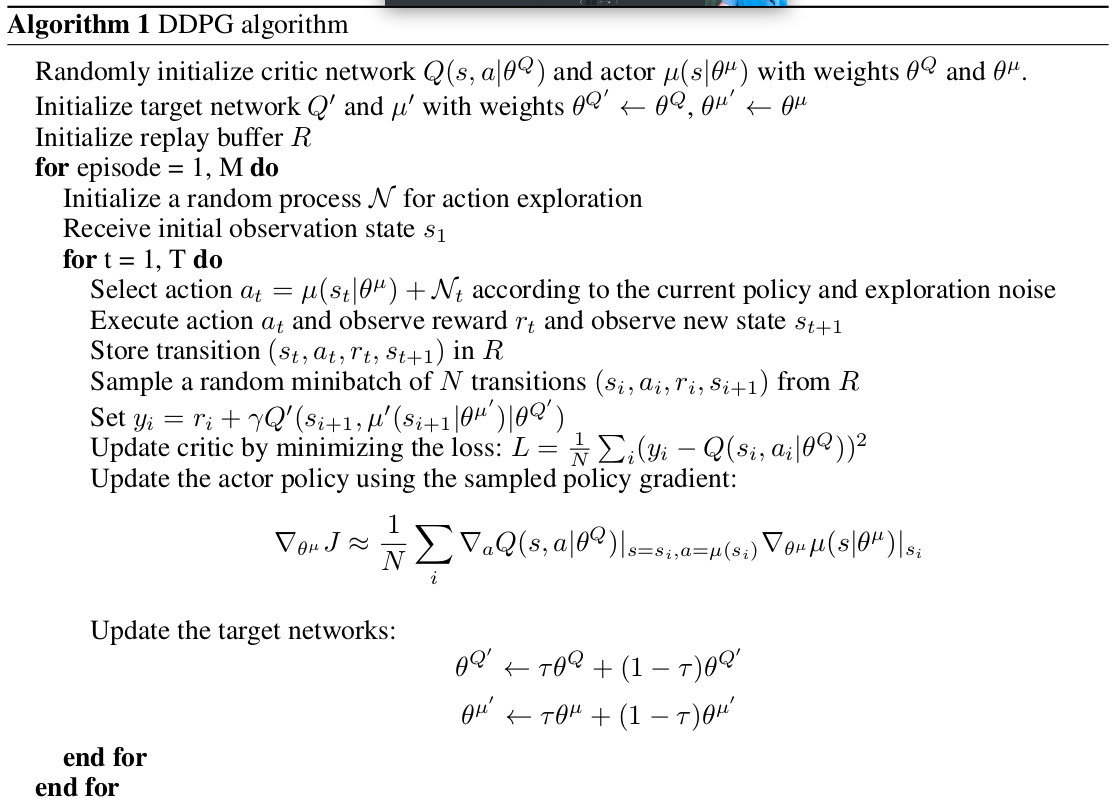

Episode 100	Average Score: -113.69	Score: -99.91
Episode 200	Average Score: -122.37	Score: -121.08
Episode 300	Average Score: -120.18	Score: -117.20
Episode 400	Average Score: -118.91	Score: -151.60
Episode 500	Average Score: -151.59	Score: -156.25
Episode 600	Average Score: -151.74	Score: -148.19
Episode 700	Average Score: -150.79	Score: -145.99
Episode 800	Average Score: -152.09	Score: -150.56
Episode 900	Average Score: -150.37	Score: -150.30
Episode 1000	Average Score: -151.14	Score: -148.03
Episode 1100	Average Score: -151.07	Score: -150.86
Episode 1200	Average Score: -150.89	Score: -150.82
Episode 1300	Average Score: -151.41	Score: -150.75
Episode 1400	Average Score: -151.02	Score: -150.50
Episode 1500	Average Score: -150.42	Score: -158.06
Episode 1600	Average Score: -151.02	Score: -154.78
Episode 1700	Average Score: -150.78	Score: -152.36
Episode 1800	Average Score: -151.67	Score: -142.77
Episode 1900	Average Score: -151.18	Score: -146.19
Episode 2000	Average Score: -151.24	Score

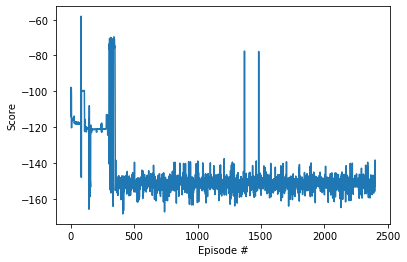

In [3]:
def ddpg(n_episodes=2400, max_t=700):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        #Initialize the simulation
        state = env.reset() # Initial state
        agent.reset()# Reset the noise to be add to the mesures (a Ornstein-Uhlenbeck noise ) | https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process
        score = 0 # intial score
        
        for t in range(max_t): # from time 0 to tmax
            action = agent.act(state) # computes the action to be preform using the net policy without training, obtained from the actor_local,net that we are not currently training
            next_state, reward, done, _ = env.step(action) # Execute the action on the enviorment, obtaining next_state, etc
            agent.step(state, action, reward, next_state, done) # First only save the data, once it has enough data trains,with the samples the local net and update soft the target
                                                                
                                                                # To train it take a random sample from the memory
                                                                
                                                                #Critic
                            
                                                                # Compute the Q target using critic_target, applying the actions of the actor_target, net we are training
                                                                # Q_targets = r + γ * critic_target(next_state, actor_target(next_state)) 
                                    
                                                                # Compute the Q local using the critic_local, net we are not training
                                                                
                                                                # Compute the mean square error between the Qs
                                                                # F.mse_loss(Q_expected, Q_targets), it does ((Q_expected-Q_target)**2).mean() 
                                                    
                                                                # update local critic parameters from the gradient of this error
                                                        
                                                                # Do an interpolation between the critic local, we are not training and the target
                                                                # θ_target = τ*θ_local + (1 - τ)*θ_target
                                                
                                                                # Actor
                                                                # Determine the action with the actor_local, the net we are not training now
                                                                # determine with the critic_local, the net we are not training now, the error
                                                                # do the gradient
                                                                # obtain the parameters from the optimizer
                                                                # Do an interpolation between the actor_local, we are not training and the target
                                                                # θ_target = τ*θ_local + (1 - τ)*θ_target
                                                                
                            
                            
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 100 == 0:
            np.save('scoresfile',scores)
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [15]:

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
agent.reset()   
while True:
    action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    if done:
        break
        
env.close()

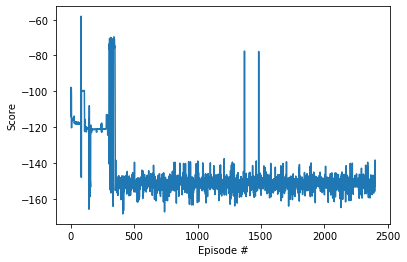

In [14]:
scores = np.load('scoresfile.npy')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()